# 1. Description of the Dataset

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€



# 2. Loading all the required packages 

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# 3. Loading dataset

In [138]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDAT.csv', skiprows=1)

In [139]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [140]:
#checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


# 4. Data pre processing

In [141]:
#checking description of the dataset
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [142]:
#4.1 checking null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [143]:
#Null Value imputation
df['month'].value_counts()
df['month']=df['month'].fillna(df['month'].mode()[0])
df['month'].isnull().sum() 

0

In [144]:
#imputing null value for year field
df['year'].value_counts()
df['year']=df['year'].fillna(df['year'].mode()[0])
df['year'].isnull().sum() 

0

In [145]:
#Null value imputation of tempreture
df['Temperature'].value_counts()

35    29
31    25
34    24
33    23
30    22
32    21
36    21
29    18
28    15
37     9
27     8
25     6
39     6
26     5
24     3
38     3
40     3
22     2
42     1
Name: Temperature, dtype: int64

In [148]:
#from here we can checking if there is any null value or not
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 28.5+ KB


In [150]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [151]:
#found some spaces in columns so trying to remove all the spaces here by rename
df.rename(columns={' RH':'RH',' Ws':'Ws','Rain ':'Rain','Classes  ':'Classes'},inplace=True)

In [152]:
#now checking rename worked or not 
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [153]:
#checking unique values of BUI
df['BUI'].unique()

array([ 3.4,  3.9,  2.7,  1.7,  7. , 10.9, 13.5, 10.5, 12.6, 15.8, 17.7,
        6.7,  4.4,  3. ,  2.2,  1.6,  2.4,  5.3,  5.1,  8.4,  9.7, 11.5,
       14.9, 18.3, 21.6, 25.8, 29.7, 23.8, 28.3,  2.9,  2.8,  5.7,  9.1,
       12.5, 12.1, 15.4,  7.4,  5.8,  8.1,  9.2, 11.7,  5.9,  8.3, 11.1,
       14.2, 18.2, 16.5, 22.4, 21.7, 14.7, 18.5, 23.9, 29.4, 32.1, 35. ,
       37.4, 41.2,  4.7,  5.5,  8.2, 17.2, 14.1, 17.9, 21.9, 25.5, 20.7,
       24.4, 27.2, 22. , 17.6, 22.9, 27.5, 31.3, 34.7, 38.8, 43.1, 47.5,
       50.9, 54.7, 57.1, 59.3, 62.9, 67.4,  1.8,  1.1,  5.6,  2.6,  3.7,
        1.4,  4.2,  7.7, 11.3, 16. , 19.2, 12.9,  9.6,  6.2,  9. ,  6.8,
        6.5,  9.3, 10.7,  7.3, 13.1, 18. , 21.2,  6.1,  7.1,  4.1,  3.8,
        9.9, 12.7, 16.4, 20.8, 27.1, 17.8,  3.3,  7.8, 10.3, 18.7, 16.7,
       13.7,  9.4, 20.9, 27.7, 32.6, 39.5, 44. , 46.5, 11.4, 11.8, 15.7,
       19.5, 10.6, 16.9, 23.5,  6.9, 11. , 18.4, 17.5, 22.3, 19. , 24.2,
       30.4, 35.9, 35.5, 38.1, 41.3, 45.5, 50.2, 54

In [156]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [157]:
#converting data type of columns
df['Temperature']=df['Temperature'].astype('float64')
df['day']=df['day'].astype('int64')
df['month']=df['month'].astype('int64')
df['year']=df['year'].astype('int64')
df['RH']=df['RH'].astype('float64')
df['Ws']=df['Ws'].astype('float64')
df['Rain']=df['Rain'].astype('float64')
df['FFMC']=df['FFMC'].astype('float64')
df['DMC']=df['DMC'].astype('float64')
df['DC']=df['DC'].astype('float64')
df['ISI']=df['ISI'].astype('float64')
df['BUI']=df['BUI'].astype('float64')
df['FWI']=df['FWI'].astype('float64')

In [257]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000,-0.009400,NaN,0.096001,-0.070465,0.038735,-0.113130,0.216204,0.488574,0.525818,0.173748,0.514464,0.346477,0.195572
month,-0.009400,1.000000,NaN,-0.059505,-0.034650,-0.048731,0.035286,0.007563,0.063059,0.123520,0.058308,0.080588,0.077022,0.016095
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.096001,-0.059505,NaN,1.000000,-0.654829,-0.279276,-0.326794,0.680171,0.483884,0.370902,0.607036,0.457128,0.567659,0.519291
RH,-0.070465,-0.034650,NaN,-0.654829,1.000000,0.240177,0.223216,-0.645312,-0.403774,-0.218663,-0.687701,-0.348181,-0.579600,-0.433653
Ws,0.038735,-0.048731,NaN,-0.279276,0.240177,1.000000,0.170562,-0.172025,-0.006351,0.072142,0.007124,0.025401,0.029352,-0.072825
Rain,-0.113130,0.035286,NaN,-0.326794,0.223216,0.170562,1.000000,-0.546607,-0.289251,-0.297370,-0.348711,-0.300124,-0.325443,-0.380614
FFMC,0.216204,0.007563,NaN,0.680171,-0.645312,-0.172025,-0.546607,1.000000,0.600304,0.501693,0.739498,0.588114,0.690118,0.768691
DMC,0.488574,0.063059,NaN,0.483884,-0.403774,-0.006351,-0.289251,0.600304,1.000000,0.874946,0.677040,0.982135,0.874729,0.582283
DC,0.525818,0.123520,NaN,0.370902,-0.218663,0.072142,-0.297370,0.501693,0.874946,1.000000,0.502161,0.941493,0.736179,0.505193


In [158]:
df.info(linewidth = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(10), int64(3), object(1)
memory usage: 28.5+ KB


In [160]:
#checking unique value of classes and getting too many unique values as not fire and fire
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

# 4. EDA

In [161]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [204]:
#Bivariate analysis

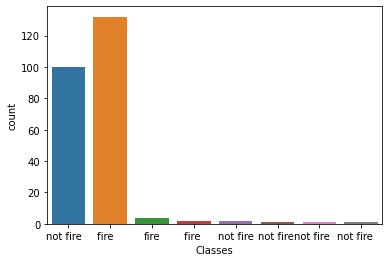

In [163]:
#doing encoding to convert categorical value into numerical value
sns.countplot(df['Classes'])
df['Classes']=df['Classes'].map({'not fire   ':0, 'fire   ':1, 'fire':1, 'fire ':1, 'not fire':0, 'not fire ':0,
       'not fire     ':0, 'not fire    ':0})


<AxesSubplot:xlabel='Classes', ylabel='count'>

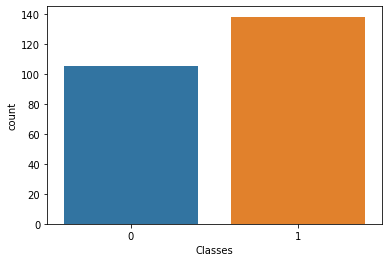

In [180]:
sns.countplot(df['Classes'])

<AxesSubplot:xlabel='month', ylabel='Temperature'>

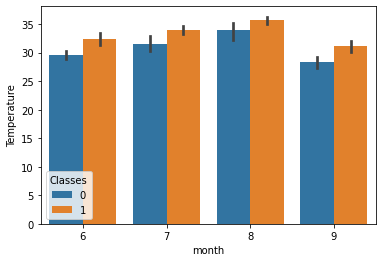

In [179]:
#Month wise file or not fire from here i hot 8th monthis having maximum fire
sns.barplot('month','Temperature',hue='Classes',data=df)

<AxesSubplot:xlabel='Ws', ylabel='Classes'>

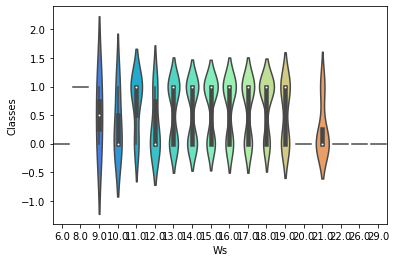

In [224]:
sns.violinplot(x="Ws", y="Classes", data=df,palette='rainbow')

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

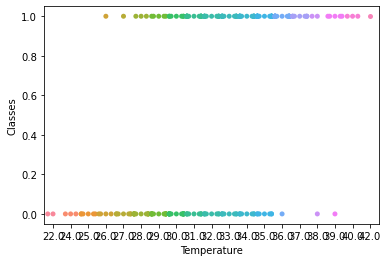

In [231]:
sns.swarmplot(x="Temperature", y="Classes", data=df)

<AxesSubplot:xlabel='year', ylabel='Classes'>

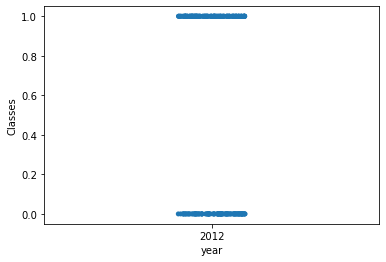

In [234]:
sns.stripplot(x="year", y="Classes", data=df)

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

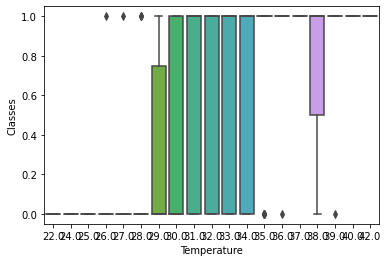

In [236]:
sns.boxplot(x='Temperature',y='Classes',data=df)

# Distribution plot

<AxesSubplot:xlabel='Classes', ylabel='Density'>

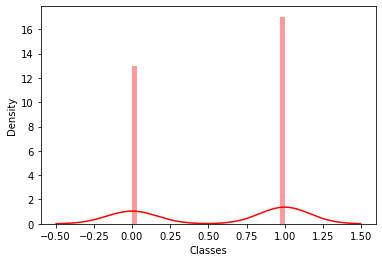

In [268]:
sns.distplot(df['Classes'], kde = True, color ='red', bins = 30)

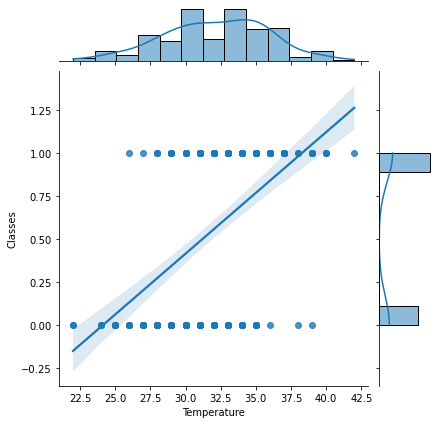

In [273]:
sns.jointplot(x = "Temperature", y = "Classes",kind = "reg", data = df, dropna = True)

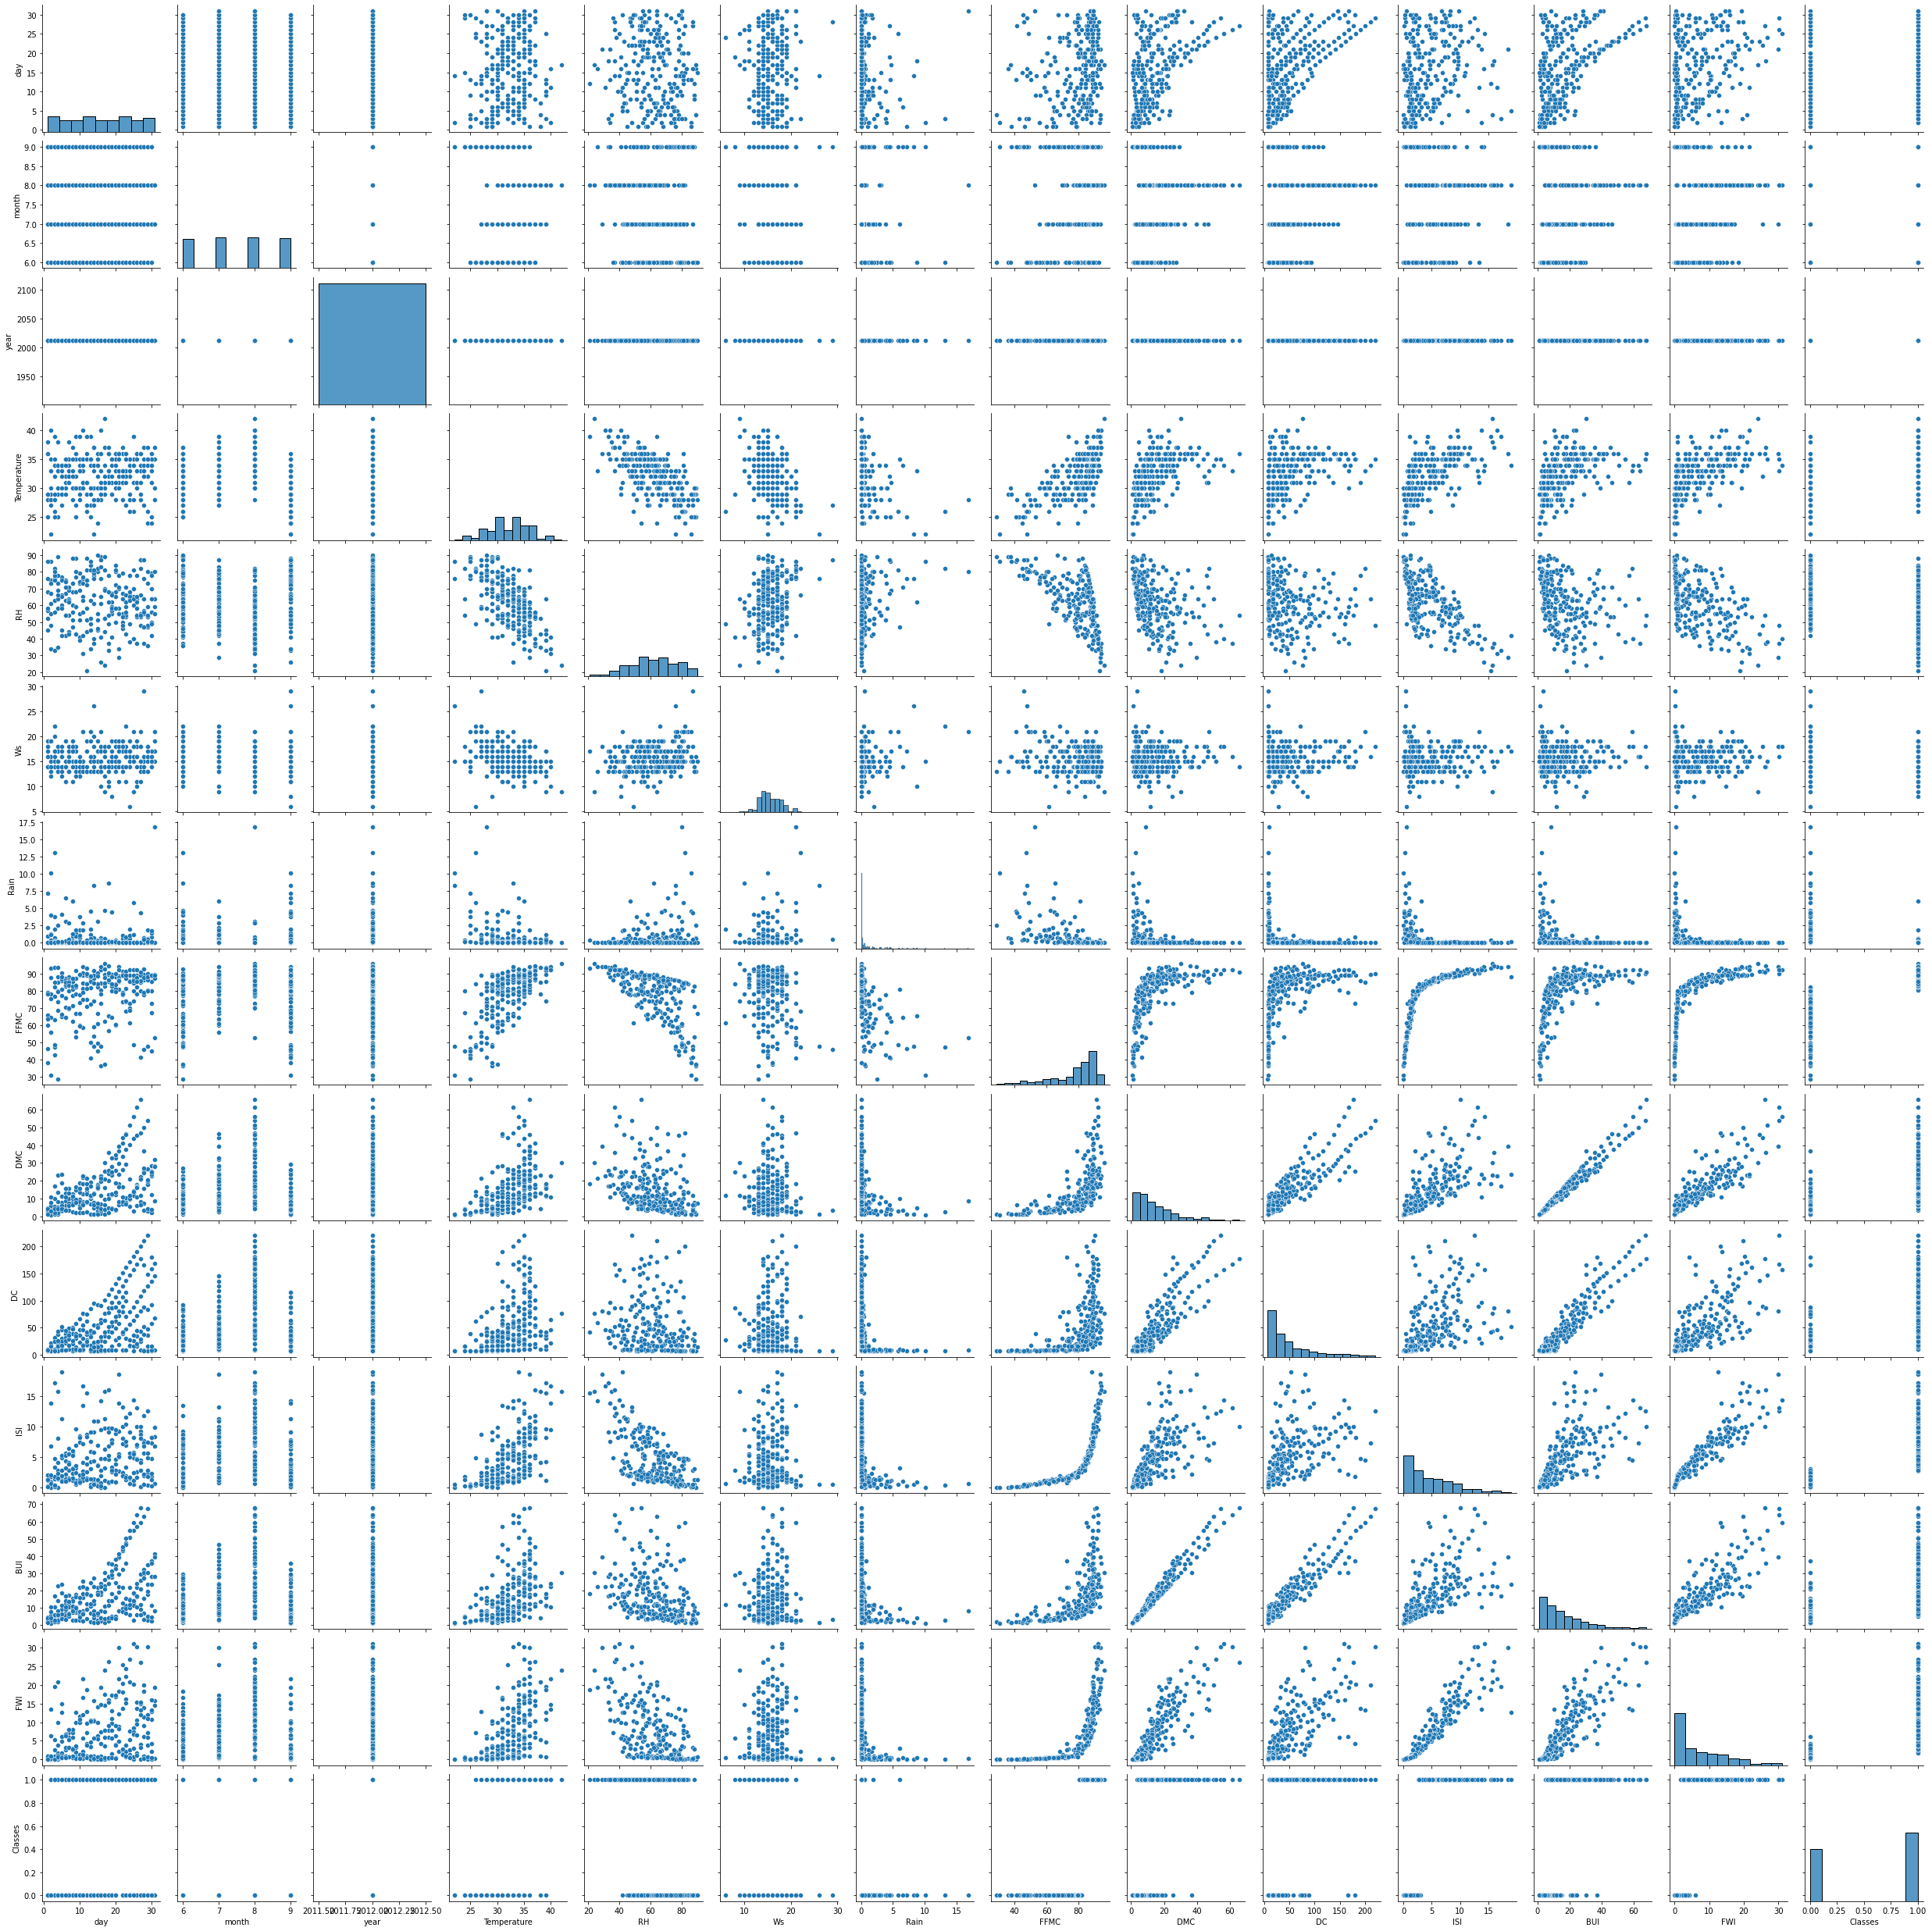

In [246]:
sns.pairplot(df)

# Month wise Analysis

In [186]:
#1. Grouping by on the basis of month
month=df.groupby('month')
month

In [187]:
#1. As we can see here in every month fire happend and that happend always in every month's last day and tempreture of every 
#2. Month is also more than 35 tempreture every month
month.max()

,day,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
month,,,,,,,,,,,,,
6,30,2012,37.0,90.0,22.0,13.1,92.5,27.2,92.8,13.4,29.7,18.4,1
7,31,2012,39.0,87.0,22.0,6.0,93.9,46.6,145.7,18.5,46.5,30.0,1
8,31,2012,42.0,82.0,21.0,16.8,96.0,65.9,220.4,19.0,68.0,31.1,1
9,30,2012,36.0,88.0,29.0,10.1,93.9,29.4,115.6,14.2,36.0,21.6,1


In [190]:
#1. Here we can see always in starting days of month fire didn't happened 
#2. whenever rain was not there fire didnt happened 
#3. In month of starting days tempreture was also bettween 20 to 30 every month
month.min()

,day,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
month,,,,,,,,,,,,,
6,1,2012,25.0,36.0,10.0,0.0,28.6,1.1,6.9,0.0,1.6,0.0,0
7,1,2012,27.0,29.0,9.0,0.0,55.7,2.4,8.3,0.7,2.8,0.3,0
8,1,2012,28.0,21.0,9.0,0.0,52.5,4.4,8.7,0.6,4.4,0.3,0
9,1,2012,22.0,26.0,6.0,0.0,30.5,0.7,7.0,0.0,1.1,0.0,0


# Day Wise Analysis

In [191]:
#1. Grouping by on the basis of Day
day=df.groupby('day')
day

In [192]:
#1. From here we can see that in 9th month everyday almost fire happened and tempreture was high
#2. only for day 1 fire never happened but tempreture was maximum
#3. And day 31st fire happened but it happened in 8th month
day.max()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,,,,,,,,,,,,,
1,9,2012,38.0,86.0,19.0,7.2,78.8,4.8,10.5,2.0,4.7,0.9,0
2,9,2012,40.0,86.0,19.0,10.1,93.3,10.8,21.4,13.8,10.6,13.5,1
3,9,2012,39.0,82.0,22.0,13.1,93.7,17.1,32.1,17.2,16.9,19.5,1
4,9,2012,38.0,89.0,18.0,2.5,93.8,23.0,42.7,15.7,22.9,20.9,1
5,9,2012,34.0,77.0,18.0,4.1,90.5,23.6,52.5,19.0,23.5,15.0,1
6,9,2012,35.0,75.0,19.0,6.5,87.0,15.5,45.1,5.6,16.7,6.8,1
7,9,2012,38.0,71.0,18.0,2.9,88.2,15.5,48.6,6.4,17.2,8.0,1
8,9,2012,37.0,88.0,19.0,6.0,87.4,12.5,49.8,6.0,15.4,8.0,1
9,9,2012,39.0,88.0,18.0,1.9,91.7,16.5,57.0,9.6,17.9,12.7,1


In [193]:
#1. everyday 6th month is having minimum fire except 31st
#2. on 31st 7th month is having minimum tempreture and no fire
day.min()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,,,,,,,,,,,,,
1,6,2012,25.0,45.0,14.0,0.0,37.9,0.9,7.5,0.1,1.4,0.0,0
2,6,2012,22.0,34.0,12.0,0.0,30.5,0.7,7.0,0.0,1.1,0.0,0
3,6,2012,25.0,33.0,14.0,0.0,42.6,1.2,7.1,0.1,1.7,0.0,0
4,6,2012,25.0,35.0,13.0,0.0,28.6,1.3,6.9,0.0,1.7,0.0,0
5,6,2012,27.0,42.0,12.0,0.0,64.8,3.0,8.4,1.0,3.9,0.4,0
6,6,2012,29.0,42.0,11.0,0.0,64.5,3.3,9.1,1.0,3.5,0.4,0
7,6,2012,31.0,43.0,13.0,0.0,69.6,3.2,9.8,1.2,5.1,0.6,0
8,6,2012,28.0,47.0,11.0,0.0,62.0,2.6,7.4,1.1,3.0,0.4,0
9,6,2012,25.0,43.0,12.0,0.0,52.9,2.1,8.4,0.4,2.6,0.2,0


# Tempreture wise analysis

In [196]:
tempreture=df.groupby('Temperature')
tempreture

In [197]:
#1. We can see whenever tempreture is having more than 25 mostly fire happened and rain also happened
#2. In 9th month maximum tempreture was 36 but in 8th month maximum tempreture was 42 so overall max tempreture was in 8th  month
#3. maximum tempreture happend in which day also we can see from here
tempreture.max()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,,,,,,,,,,,,,
22.0,14,9,2012,86.0,26.0,10.1,47.4,1.1,7.0,0.4,1.6,0.1,0
24.0,30,9,2012,82.0,18.0,0.4,79.7,4.3,16.5,1.7,5.1,0.7,0
25.0,30,9,2012,89.0,21.0,7.2,52.9,7.9,38.8,0.4,10.5,0.3,0
26.0,29,9,2012,82.0,22.0,13.1,84.0,13.8,61.4,4.8,17.7,7.1,1
27.0,28,9,2012,87.0,29.0,1.2,88.9,21.3,71.3,8.7,21.2,12.9,1
28.0,31,9,2012,90.0,21.0,16.8,84.6,16.4,79.9,4.5,21.7,6.3,1
29.0,27,9,2012,89.0,19.0,2.0,89.3,24.9,86.0,9.1,28.9,10.3,1
30.0,31,9,2012,89.0,21.0,4.1,89.4,27.8,168.2,9.8,39.3,19.4,1
31.0,30,9,2012,83.0,21.0,4.7,90.6,46.6,190.6,13.4,57.1,16.7,1


In [198]:
#1. In 6th month mostly min tempreture was there and fire also not happened in 6th monthly mostly
#2. In 6th month mostly rain also didn't happened
tempreture.min()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,,,,,,,,,,,,,
22.0,2,9,2012,76.0,15.0,8.3,30.5,0.7,7.0,0.0,1.1,0.0,0
24.0,15,9,2012,54.0,15.0,0.1,44.9,0.9,7.3,0.2,1.4,0.0,0
25.0,1,6,2012,76.0,13.0,0.2,28.6,1.2,6.9,0.0,1.7,0.0,0
26.0,3,6,2012,49.0,6.0,0.0,47.1,2.5,7.1,0.3,2.7,0.1,0
27.0,2,6,2012,58.0,16.0,0.0,45.9,2.4,7.3,0.4,2.8,0.2,0
28.0,1,6,2012,51.0,12.0,0.0,41.1,2.9,7.4,0.1,3.0,0.0,0
29.0,1,6,2012,41.0,8.0,0.0,36.1,0.9,7.6,0.0,1.4,0.0,0
30.0,2,6,2012,41.0,12.0,0.0,37.3,1.1,7.8,0.0,1.6,0.0,0
31.0,6,6,2012,42.0,11.0,0.0,56.9,1.9,8.0,0.7,2.4,0.2,0


In [200]:
#Maximum rain
df['Rain'].max()

16.8

In [201]:
#Minimum rain
df['Rain'].min()

0.0

<AxesSubplot:xlabel='day', ylabel='Temperature'>

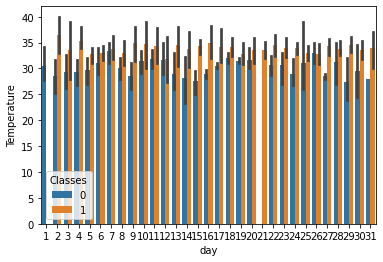

In [184]:
sns.barplot('day','Temperature',hue='Classes',data=df)

In [182]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 36.6 KB


In [166]:
df['Classes'].unique()

array([0, 1], dtype=int64)

# 5. Feature engineering

In [167]:
x=df.drop('Temperature',axis=1)

In [168]:
x.head(2)

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0


In [169]:
y=df['Temperature']

In [170]:
y.head(5)

0    29.0
1    29.0
2    26.0
3    25.0
4    27.0
Name: Temperature, dtype: float64

In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [172]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Linear Regression model buildng

In [173]:
from sklearn import metrics

from sklearn.linear_model import LinearRegression
LinearRegresion = LinearRegression()
LinearRegresion.fit(x_train, y_train)

LinearRegression()

In [274]:
print(LinearRegresion.coef_)

[-4.54353148e-01 -2.49906439e-01  3.33066907e-15 -1.12060280e+00
 -7.83696463e-01  3.05741408e-01  1.60248917e+00  3.17915621e+00
  2.27346783e+00  2.08009553e-01 -4.45426671e+00 -2.65632507e-01
  2.71613556e-03]


In [275]:
print(LinearRegresion.intercept_)

32.111111111111114


In [174]:
LinearRegresion.score(x_train, y_train),LinearRegresion.score(x_test, y_test)

(0.6142277386866077, 0.4649607330120328)

In [248]:
y_pred=LinearRegresion.predict(x_test)

In [249]:
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,31.0,33.076685
1,33.0,35.208114
2,33.0,34.628676
3,34.0,33.279740
4,30.0,32.393351
5,39.0,32.642015
6,28.0,31.461923
7,34.0,32.904260
8,28.0,31.913939
9,31.0,31.225096


<AxesSubplot:>

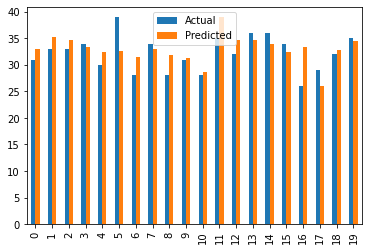

In [250]:
#Evaluating accuracy using bar plot
evaluate.head(20).plot(kind = 'bar')

In [252]:
#Checking loss function
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.4649607330120328, 1.9673732215670054, 2.550609293404478)

# Ridge Model Buliding

In [276]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.01) 
RR.fit(x_train, y_train)
RR_train_score=RR.score(x_train, y_train)
RR_test_score=RR.score(x_test, y_test)
RR_train_score, RR_test_score

(0.6142183480073318, 0.46806564113663995)

In [279]:
y_pred=RR.predict(x_test)
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,31.0,33.080553
1,33.0,35.201872
2,33.0,34.620253
3,34.0,33.292521
4,30.0,32.387875
5,39.0,32.656523
6,28.0,31.457769
7,34.0,32.930131
8,28.0,31.917051
9,31.0,31.232489


<AxesSubplot:>

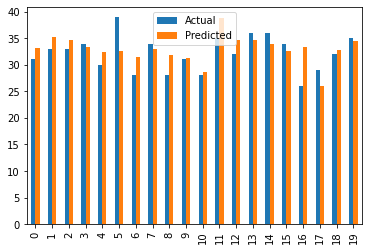

In [280]:
#Evaluating accuracy using bar plot
evaluate.head(20).plot(kind = 'bar')

In [281]:
#Checking loss function
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.46806564113663995, 1.9621941591198389, 2.5431977529581404)

# Lasso Model building

In [282]:
#building model with lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
test_score=lasso.score(x_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
train_score, test_score

(0.4743453342773609, 0.4355318931608668)

In [283]:
#Predicting y target variable using our lasso build model
y_pred=lasso.predict(x_test)
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,31.0,32.816375
1,33.0,33.408092
2,33.0,33.645929
3,34.0,32.538568
4,30.0,32.667357
5,39.0,31.808524
6,28.0,31.942823
7,34.0,33.313433
8,28.0,31.049861
9,31.0,32.785370


<AxesSubplot:>

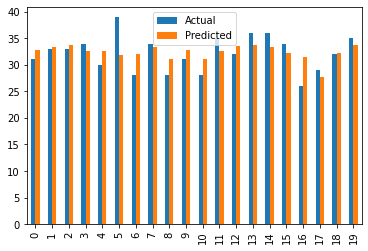

In [284]:
#Evaluating accuracy using bar plot
evaluate.head(20).plot(kind = 'bar')

In [285]:
#Checking loss function
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.4355318931608668, 2.0977194110722754, 2.619816143200309)

In [287]:
#Doing Hyperparameter tunning to improve my accuracy using alpha=0.01
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=0.01, max_iter=10e5)
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
test_score=lasso.score(x_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
train_score, test_score

(0.6116890239491347, 0.4917474421461443)

In [288]:
#Predicting y target variable using our lasso build model
y_pred=lasso.predict(x_test)
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,31.0,33.145117
1,33.0,35.066820
2,33.0,34.466905
3,34.0,33.388830
4,30.0,32.372205
5,39.0,32.805289
6,28.0,31.427549
7,34.0,33.310344
8,28.0,31.844588
9,31.0,31.399905


<AxesSubplot:>

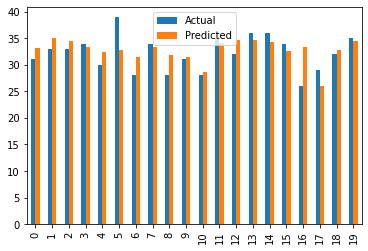

In [289]:
#Evaluating accuracy using bar plot
evaluate.head(20).plot(kind = 'bar')

In [290]:
#Checking loss function
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.4917474421461443, 1.9046529716223748, 2.4859414516401945)

In [296]:
#Doing Hyperparameter tunning to improve my accuracy using alpha=0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x_train,y_train)
train_score00001=lasso00001.score(x_train,y_train)
test_score00001=lasso00001.score(x_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
train_score00001, test_score00001

(0.6142255592311834, 0.46650317029212907)

In [293]:
#Predicting y target variable using our lasso build model
y_pred=lasso00001.predict(x_test)
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,31.0,33.078480
1,33.0,35.204571
2,33.0,34.624013
3,34.0,33.285018
4,30.0,32.391009
5,39.0,32.648386
6,28.0,31.459964
7,34.0,32.916782
8,28.0,31.914478
9,31.0,31.229307


<AxesSubplot:>

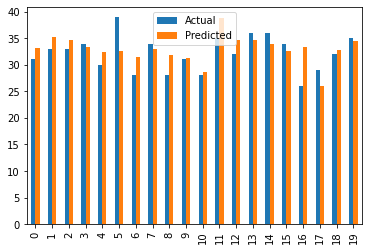

In [294]:
#Evaluating accuracy using bar plot
evaluate.head(20).plot(kind = 'bar')

In [295]:
#Checking loss function
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.46650317029212907, 1.9648556064957563, 2.5469301294703923)

# Model building using elastic net

In [297]:
from sklearn.linear_model import ElasticNet
Ridge= Lasso(alpha=0.01, max_iter=10e5)
Ridge.fit(x_train,y_train)
train_score=Ridge.score(x_train,y_train)
test_score=Ridge.score(x_test,y_test)
train_score,test_score

(0.6116890239491347, 0.4917474421461443)

In [298]:
#Predicting y target variable using our Ridge build model
y_pred=Ridge.predict(x_test)
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,31.0,33.145117
1,33.0,35.066820
2,33.0,34.466905
3,34.0,33.388830
4,30.0,32.372205
5,39.0,32.805289
6,28.0,31.427549
7,34.0,33.310344
8,28.0,31.844588
9,31.0,31.399905


<AxesSubplot:>

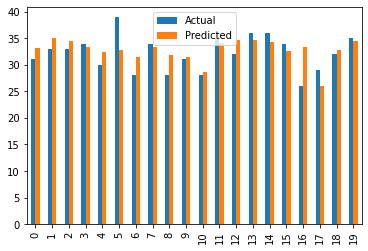

In [299]:
#Evaluating accuracy using bar plot
evaluate.head(20).plot(kind = 'bar')

In [300]:
#Checking loss function
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.4917474421461443, 1.9046529716223748, 2.4859414516401945)